# Scraping the news portal from the website https://www.nepalnews.com/

In [1]:
# Importing required modules

import requests as req
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Requesting homepage of website and making soup using beautifulsoup

homepage_request = req.get('https://www.nepalnews.com/')
soup = BeautifulSoup(homepage_request.content, "html.parser")

Open the website and press F12(or right click on screen and click on inspect) then you'll find developer screen on the right hand side of the screen, then press on litle screen with pointer type of symbol(refer to SCREENSHOT_ELEMENT shown below) and then click on the title of the news as shown in the next SCREENSHOT not the below one. 

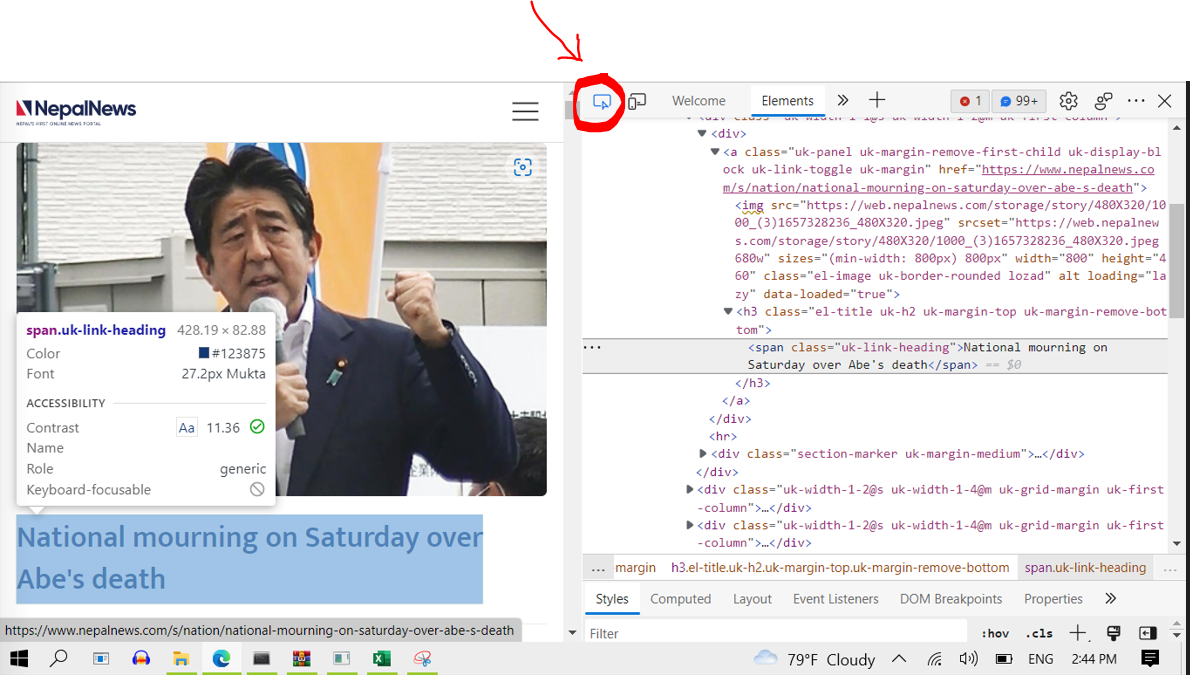

It is evident from the website that all the text related to the title of each news is in span, you can refer to SCREENSHOT below. So adding all the topics.

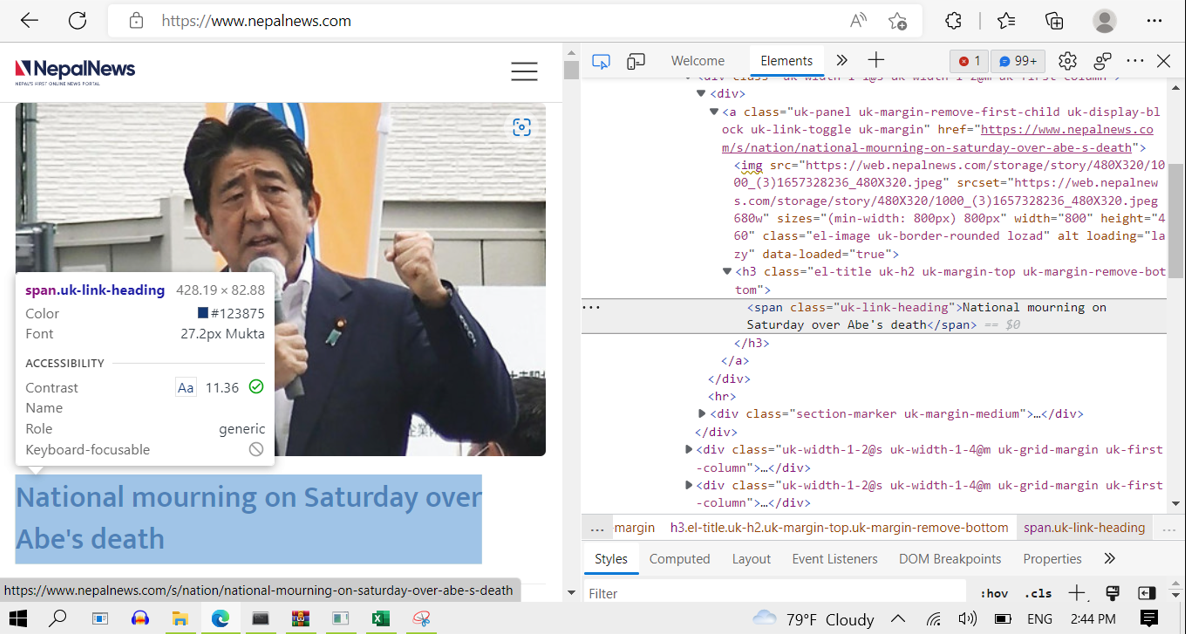

In [3]:
# Make list of titles present in class 'uk-link-heading' of span

news_title=[]
for x in soup.findAll('span',class_='uk-link-heading'):
    if x.text not in news_title:
        news_title.append(x.text)

In [4]:
# Printing newstitle

news_title

["National mourning on Saturday over Abe's death",
 'CPN (Maoist Centre) to run campaign, targeting elections',
 'PM Deuba urges TU to produce competent human resources',
 'President appoints resident ambassadors to three countries',
 'Former Minister Kripasur Sherpa in critical condition post accident',
 'ILO official calls on Labour Minister Kunwar',
 'Scooter rider killed in road mishap',
 'Nepal Police to look after security in Kathmandu Valley',
 'Patan High Court Bar Association, voting underway',
 '5 killed in wild elephant attack in a year in Jhapa',
 'Death toll in Sankhuwasabha tractor accident hits three',
 'Obstructed highway resumes after four hours',
 'Heavy rainfall predicted in some parts',
 'Jamune-Khaireni road disrupted',
 'Unity among 7 provinces must enforce federalism: CM Raut',
 'Dahal asks ministers to submit details of their works',
 'Federalism is important for public interest: Minister Shrestha',
 'Outgoing Finance Minister Sharma laments political prejudice'

In [5]:
# Number of news_title

len(news_title)

67

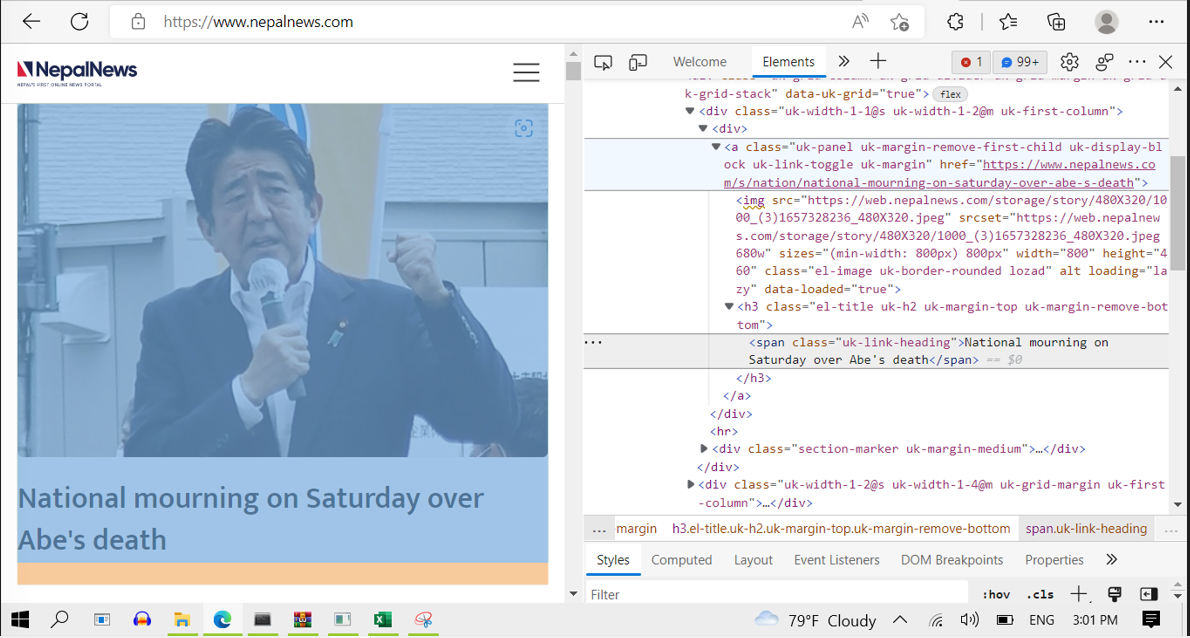

We notice from the website that all the links related to the title of each news is in 'a' tag, you can refer to above SCREENSHOT. So adding all the links.

In [6]:
#Adding links

links=[]
for x in soup.find_all('a',class_='uk-panel uk-margin-remove-first-child uk-display-block uk-link-toggle uk-margin'):
    links.append(x.get('href'))

In [7]:
# Printing links

links

['https://www.nepalnews.com/s/nation/national-mourning-on-saturday-over-abe-s-death',
 'https://www.nepalnews.com/s/politics/cpn-maoist-centre-to-run-campaign-targeting-elections']

We found only first two links, so adding other links from another class under the same tag 'a'. Refer to SCREENSHOT below.

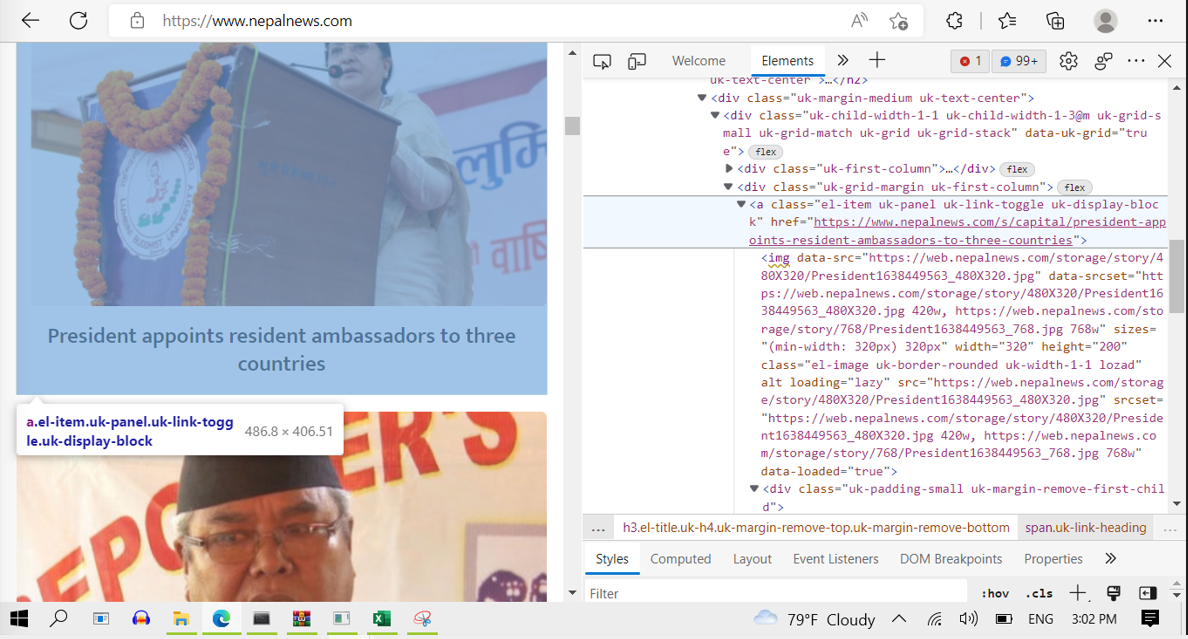

In [8]:
# Adding remaining links from class given below inside 'a' tags

for x in soup.find_all('a',class_='el-item uk-panel uk-link-toggle uk-display-block'):
    if x.get('href') not in links:
        links.append(x.get('href'))

In [9]:
# Print links

print(links)

['https://www.nepalnews.com/s/nation/national-mourning-on-saturday-over-abe-s-death', 'https://www.nepalnews.com/s/politics/cpn-maoist-centre-to-run-campaign-targeting-elections', 'https://www.nepalnews.com/s/capital/pm-deuba-urges-tu-to-produce-competent-human-resources', 'https://www.nepalnews.com/s/capital/president-appoints-resident-ambassadors-to-three-countries', 'https://www.nepalnews.com/s/capital/former-minister-kripasur-sherpa-in-critical-condition-post-accident', 'https://www.nepalnews.com/s/capital/ilo-official-calls-on-labour-minister-kunwar', 'https://www.nepalnews.com/s/capital/scooter-rider-killed-in-road-mishap', 'https://www.nepalnews.com/s/capital/nepal-police-to-look-after-security-in-kathmandu-valley', 'https://www.nepalnews.com/s/nation/patan-high-court-bar-association-voting-underway', 'https://www.nepalnews.com/s/nation/5-killed-in-mammoth-attack-in-a-year-in-jhapa', 'https://www.nepalnews.com/s/nation/death-toll-in-sankhuwasabha-tractor-accident-hits-three', 'h

In [10]:
# Number of links

len(links)

67

Creating Dataframe

In [11]:
# Creating dataframe with columns News and Links

df=pd.DataFrame({"News":news_title,"Links":links})

In [12]:
# Printing first five rows of dataframe

df.head()

,News,Links
0,National mourning on Saturday over Abe's death,https://www.nepalnews.com/s/nation/national-mo...
1,"CPN (Maoist Centre) to run campaign, targeting...",https://www.nepalnews.com/s/politics/cpn-maois...
2,PM Deuba urges TU to produce competent human r...,https://www.nepalnews.com/s/capital/pm-deuba-u...
3,President appoints resident ambassadors to thr...,https://www.nepalnews.com/s/capital/president-...
4,Former Minister Kripasur Sherpa in critical co...,https://www.nepalnews.com/s/capital/former-min...


We can rename the index to SN and start index from 1 instead of 0

In [13]:
# Changing index range and renaming

df.index += 1 
df.index.names = ['SN']

In [14]:
# Printing head of dataframe

df.head()

,News,Links
SN,,
1,National mourning on Saturday over Abe's death,https://www.nepalnews.com/s/nation/national-mo...
2,"CPN (Maoist Centre) to run campaign, targeting...",https://www.nepalnews.com/s/politics/cpn-maois...
3,PM Deuba urges TU to produce competent human r...,https://www.nepalnews.com/s/capital/pm-deuba-u...
4,President appoints resident ambassadors to thr...,https://www.nepalnews.com/s/capital/president-...
5,Former Minister Kripasur Sherpa in critical co...,https://www.nepalnews.com/s/capital/former-min...


We can't click the link so, we will make it clickable

In [15]:
# Using clickable module of python and printing first five rows of dataframe using head()

from IPython.display import HTML
HTML(df.head().to_html(render_links=True, escape=False))

,News,Links
SN,,
1,National mourning on Saturday over Abe's death,https://www.nepalnews.com/s/nation/national-mourning-on-saturday-over-abe-s-death
2,"CPN (Maoist Centre) to run campaign, targeting elections",https://www.nepalnews.com/s/politics/cpn-maoist-centre-to-run-campaign-targeting-elections
3,PM Deuba urges TU to produce competent human resources,https://www.nepalnews.com/s/capital/pm-deuba-urges-tu-to-produce-competent-human-resources
4,President appoints resident ambassadors to three countries,https://www.nepalnews.com/s/capital/president-appoints-resident-ambassadors-to-three-countries
5,Former Minister Kripasur Sherpa in critical condition post accident,https://www.nepalnews.com/s/capital/former-minister-kripasur-sherpa-in-critical-condition-post-accident


Saving the dataframe to csv or excel file in desktop

In [16]:
# Saving in csv format

df.to_csv("C:\\Users\\Arzun\\Desktop\\news_csv.csv")


# Saving in excel format

df.to_excel("C:\\Users\\Arzun\\Desktop\\news_excel.xlsx")